In [ ]:
# Loading all necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Loading the dataset of user 0
User0 = pd.read_csv('User0_BEHACOM.csv', encoding='latin1')

In [ ]:
# Dropping the unnecessary columns
B = User0.drop(columns=['current_app', 'penultimate_app','USER', 'timestamp'])

In [ ]:
# Defining training set
B_train = B

# Random scalar
x = 50 

# Defining the testing data        
B_test = B * x

In [ ]:
# Scaling the sets
scaler = MinMaxScaler()

# The training data is fitted and transformed
B_train_scaled = scaler.fit_transform(B_train)

# The testing data is transformed
B_test_scaled = scaler.transform(B_test)

print(B_test_scaled)
print(B_train_scaled)

[[1.47773279e+01 1.00000000e+00 5.00000000e-01 ... 6.25000000e-01
  2.99745518e-04 6.07050168e-03]
 [1.42712551e+01 7.00000000e+00 2.50000000e+00 ... 9.88924051e-01
  5.71845959e-04 3.43564107e-02]
 [2.32793522e+00 1.00000000e+00 2.00000000e+00 ... 5.14240506e-01
  8.93720670e-04 4.34528768e-02]
 ...
 [1.62955466e+01 6.00000000e+00 2.00000000e+00 ... 6.25000000e-01
  1.67297693e-02 7.18555812e-02]
 [2.78340081e+01 2.50000000e+01 4.50000000e+00 ... 2.37341772e-02
  5.98752301e-03 4.49962186e-02]
 [1.29554656e+01 1.80000000e+01 7.00000000e+00 ... 1.04430380e+00
  4.64601448e-03 4.77368022e-02]]
[[2.95546559e-01 2.00000000e-02 1.00000000e-02 ... 1.25000000e-02
  5.99491035e-06 1.21410034e-04]
 [2.85425101e-01 1.40000000e-01 5.00000000e-02 ... 1.97784810e-02
  1.14369192e-05 6.87128215e-04]
 [4.65587045e-02 2.00000000e-02 4.00000000e-02 ... 1.02848101e-02
  1.78744134e-05 8.69057536e-04]
 ...
 [3.25910931e-01 1.20000000e-01 4.00000000e-02 ... 1.25000000e-02
  3.34595387e-04 1.43711162e-03]

In [ ]:
# Constructing the One Class SVM model
model = OneClassSVM(kernel='rbf', gamma='scale', nu=0.1)

In [ ]:
# Fitting the model with the training data
model.fit(B_train_scaled)

OneClassSVM(nu=0.1)

In [ ]:
# Deriving the decision function values
decisionf = model.decision_function(B_train_scaled)

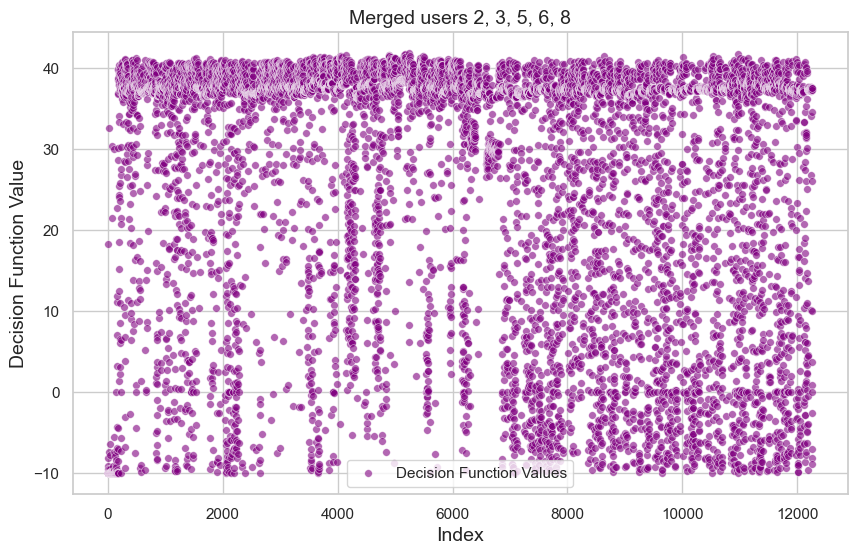

In [ ]:
sns.set(style='whitegrid', palette='muted')                     

plt.figure(figsize=(10, 6))

# Plotting the decision function output data
sns.scatterplot(x=range(len(decisionf)),
                y=decisionf, 
                color='purple', 
                marker='o', 
                s=30, 
                label='Decision Function Values', 
                alpha=0.6)

# Customising the plots
plt.title('User 0', fontsize=14)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Decision Function Value', fontsize=14)

plt.grid(True)
plt.legend()

plt.show()